# Exercise 005

<a href="https://colab.research.google.com/github/FAIRChemistry/PythonProgramming2025/blob/master/exercises/Exercise005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Please execute this cell to download the necessary data
!wget https://github.com/JR-1991/PythonProgramming2025/raw/master/data/gc_len_data.csv

--2025-06-03 13:14:55--  https://github.com/JR-1991/PythonProgramming2025/raw/master/data/gc_len_data.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JR-1991/PythonProgramming2025/master/data/gc_len_data.csv [following]
--2025-06-03 13:14:56--  https://raw.githubusercontent.com/JR-1991/PythonProgramming2025/master/data/gc_len_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3663624 (3.5M) [text/plain]
Saving to: ‘gc_len_data.csv’

gc_len_data.csv     100%[===================>]   3.49M  --.-KB/s    in 0.08s   

2025-06-03 13:14:56 (43.1 MB/s) - ‘gc_len_data.csv’ saved [3663624/3663624

In [3]:
# Please execute this cell to install the necessary packages
%pip install seaborn matplotlib pandas numpy scikit-learn

## Data Clustering #1

Read in the data `gc_len_data.csv` using Pandas, perform KMeans clustering, visualize the result with a suitable plot, and compare it to the original data.

What do you notice? Was the data clustered correctly?

**Tips**

> * To visualize the data, you may want to use a dimensionality reduction method, such as the Principal Component Analysis, to confirm the clustering result visually. Check the Sciki-Learn's documentation for guidance on implementing your own method. If you're having trouble, you can use the implementation from the previous exercise, available [here](https://jr-1991.github.io/PythonProgrammingBio24/solutions/Exercise004/).
> * This dataset consists of various data types, but the clustering method only works with numeric data. Use the `filter` method to narrow down the dataset to columns that are compatible with the algorithm.

In [4]:
#Read into a data frame with pandas
import pandas as pd
df=pd.read_csv("gc_len_data.csv")

#KMeans Clustering without dimensionality reduction
from sklearn.cluster import KMeans
import numpy as np

kmeans=KMeans(n_clusters=3)
def filter_out_text_columns(df):
  """Makes sure something is numeric, will return True, if it's not, False
  """
  return df.loc[:, df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=0)]

df_filtered=filter_out_text_columns(df)
kmeans.fit(df_filtered)
labels=kmeans.labels_
cluster_centers=kmeans.cluster_centers_
print(len(labels))
print(f"labels:{labels}")
print(len(cluster_centers))
print(f"centers:{cluster_centers}")

#So if there is no dimensionality reduction, the KMeans cluster is not interpretable since we can only do 3D arrays, this takes in the 3000 rows as labels and gives back three centers between all of those data, it uses 65 coordinates for that.

<ipython-input-4-a1bd5466e815>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.loc[:, df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=0)]


3000
labels:[2 2 1 ... 2 1 2]
3
centers:[[1.80393638e+03 4.84179125e-01 1.49349097e-02 1.78863367e-02
  1.97434238e-02 2.15178854e-02 1.52649425e-02 1.41697771e-02
  1.16418028e-02 1.30900934e-02 1.69745820e-02 1.99078138e-02
  2.55361523e-02 2.23211518e-02 1.45109852e-02 1.19711510e-02
  1.51289648e-02 1.42094432e-02 7.36736525e-03 1.32499405e-02
  1.78942127e-02 1.65075208e-02 1.68628961e-02 1.16974294e-02
  1.56250758e-02 1.43327228e-02 1.20427111e-02 1.53385736e-02
  1.71727347e-02 1.85628635e-02 1.07345645e-02 1.36270246e-02
  1.43067208e-02 1.04212188e-02 1.06669255e-02 1.27426382e-02
  1.67096977e-02 1.82656342e-02 1.93213847e-02 1.67493859e-02
  1.55525367e-02 1.90896633e-02 1.45393539e-02 2.25354108e-02
  2.32609156e-02 1.82016600e-02 1.76195491e-02 1.60327015e-02
  1.24621731e-02 1.61266820e-02 1.91740979e-02 1.43181634e-02
  1.25311366e-02 1.64912583e-02 1.88705018e-02 2.25820758e-02
  1.41244196e-02 1.89857982e-02 1.15399938e-02 1.51730005e-02
  9.49468639e-03 4.62606373e-0

3000
labels:[0 2 0 ... 1 0 1]
3
centers:[[ 0.2627765   0.16002398]
 [-0.37190794 -0.03218987]
 [ 0.37408463 -0.34254812]]


<ipython-input-13-5384cdb711fe>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.loc[:, df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=0)]


<Axes: title={'center': 'Principle Component Analysis'}, xlabel='PC1', ylabel='PC2'>

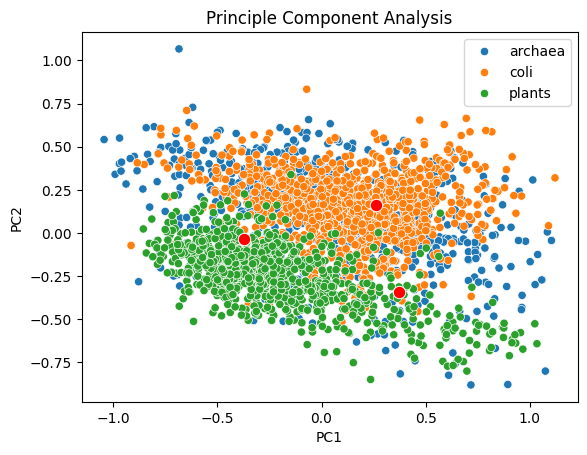

In [13]:
#Read into a data frame with pandas
import pandas as pd
df=pd.read_csv("gc_len_data.csv")

#KMeans Clustering with dimensionality reduction (PCA)
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

def filter_out_text_columns(df):
  """Makes sure something is numeric, will return True, if it's not, False
  """
  return df.loc[:, df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=0)]

def pca(data: pd.DataFrame) -> pd.DataFrame:
    """Takes a DataFrame and calculates the first two principle components

    Args:
        data (pd.DataFrame): The data used to gather the PCs

    Returns:
        pd.DataFrame: The resulting PCA data
    """

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data.select_dtypes(include='number'))

    pcs = PCA(n_components=2).fit_transform(data)

    return pd.DataFrame({"PC1": pcs[:,0], "PC2": pcs[:,1]})

kmeans=KMeans(n_clusters=3)
df_filtered=filter_out_text_columns(df)
df_filtered_pca=pca(df_filtered)
kmeans.fit(df_filtered_pca)
labels=kmeans.labels_
cluster_centers=kmeans.cluster_centers_
print(len(labels))
print(f"labels:{labels}")
print(len(cluster_centers))
print(f"centers:{cluster_centers}")

# Add the labels again for the hue option
df_filtered_pca["organism"] = df.organism

#Plot PCA
plot = sns.scatterplot(data=df_filtered_pca, x="PC1", y="PC2", hue="organism")
plot.set_title("Principle Component Analysis")
#Plot centroids
#First transform from numpy array to pandas dataframe
cluster_centers_df = pd.DataFrame({'x': cluster_centers[:, 0], 'y': cluster_centers[:, 1]})
#Add to the plot
sns.scatterplot(data=cluster_centers_df, x='x', y='y', color='red', s=80, ax=plot)

#At least we can see it graphically now, but it's still not the best, but I guess I just have to get better at it lol

## Data Clustering #2

KMeans is a powerful algorithm for detecting clusters, but it requires prior knowledge and assumes linear decision boundaries. Determining the appropriate number of 'classes' in your dataset can be challenging. Review SciKit-Learn's [documentation](https://scikit-learn.org/stable/modules/clustering.html) on clustering algorithms and try out at least one or two of them to repeat the previous task.

How do they perform? Which one do you prefer and why?

In [ ]:
# I want to experiment with transductive, non-flat geometry, which is just the opposite of K means (inductive and flat geometry). I will do it with PCA dimentionality reduction as it's easy to plot and see what is going on.
#Read into a data frame with pandas
import pandas as pd
df=pd.read_csv("gc_len_data.csv")

#KMeans Clustering with dimensionality reduction (PCA)
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

def filter_out_text_columns(df):
  """Makes sure something is numeric, will return True, if it's not, False
  """
  return df.loc[:, df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=0)]

def pca(data: pd.DataFrame) -> pd.DataFrame:
    """Takes a DataFrame and calculates the first two principle components

    Args:
        data (pd.DataFrame): The data used to gather the PCs

    Returns:
        pd.DataFrame: The resulting PCA data
    """

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data.select_dtypes(include='number'))

    pcs = PCA(n_components=2).fit_transform(data)

    return pd.DataFrame({"PC1": pcs[:,0], "PC2": pcs[:,1]})

df_filtered=filter_out_text_columns(df)
df_filtered_pca=pca(df_filtered)
kmeans.fit(df_filtered_pca)
labels=kmeans.labels_
cluster_centers=kmeans.cluster_centers_
print(len(labels))
print(f"labels:{labels}")
print(len(cluster_centers))
print(f"centers:{cluster_centers}")

# Add the labels again for the hue option
df_filtered_pca["organism"] = df.organism

#Plot PCA
plot = sns.scatterplot(data=df_filtered_pca, x="PC1", y="PC2", hue="organism")
plot.set_title("Principle Component Analysis")
#Plot centroids
#First transform from numpy array to pandas dataframe
cluster_centers_df = pd.DataFrame({'x': cluster_centers[:, 0], 'y': cluster_centers[:, 1]})
#Add to the plot
sns.scatterplot(data=cluster_centers_df, x='x', y='y', color='red', s=80, ax=plot)

## Implementing KMeans

Your task is to implement the kmeans function using the provided helper functions. The kmeans function should take the input data points, the number of clusters, the maximum number of iterations, and the tolerance for convergence as arguments. It should return the final centroids and the labels assigned to each data point. The implementation is outlined as follows:

1. Initialize centroids

    * Use the `initialize_centroids` function to randomly select initial centroids from the data points.

2. Iterate until convergence or maximum iterations:

    * In each iteration
        * Assign labels to each data point based on the nearest centroid using the assign_labels function.
        * Compute new centroids as the mean of all points assigned to each cluster using the compute_centroids function.
        * Check for convergence using the has_converged function.
        * If converged, break the loop.

3. Return results:
    * Return the final centroids and the labels assigned to each data point.

### Helper functions

Execute the following cell to make use of the helper functions.

In [ ]:
import numpy as np


def initialize_centroids(X, n_clusters):
    """
    Randomly initialize centroids from the data points.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The initialized centroids.
    """
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:n_clusters]]
    return centroids


def assign_labels(X, centroids):
    """
    Assign labels to each data point based on the nearest centroid.

    Args:
        X (numpy.ndarray): The input data points.
        centroids (numpy.ndarray): The current centroids.

    Returns:
        numpy.ndarray: The labels assigned to each data point.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels


def compute_centroids(X, labels, n_clusters):
    """
    Compute new centroids as the mean of all points assigned to each cluster.

    Args:
        X (numpy.ndarray): The input data points.
        labels (numpy.ndarray): The labels assigned to each data point.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The new centroids.
    """
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            centroids[k] = np.mean(cluster_points, axis=0)
    return centroids


def has_converged(old_centroids, new_centroids, tol):
    """
    Check if the centroids have converged.

    Args:
        old_centroids (numpy.ndarray): The old centroids.
        new_centroids (numpy.ndarray): The new centroids.
        tol (float): The tolerance for convergence.

    Returns:
        bool: True if the centroids have converged, False otherwise.
    """
    return np.all(np.abs(old_centroids - new_centroids) < tol)

In [ ]:
def kmeans(df, n_clusters=3, max_iter=300, tol=1e-4):
    """
    Apply the KMeans clustering algorithm.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.

    Returns:
        tuple: The final centroids and the labels assigned to each data point.
    """

    # Leave this to convert the DataFrame to NumPy
    X = df.select_dtypes(include="number")

    # Your code here